# DDL

In [ ]:
db_path = "MusicShop.db"
%load_ext sql
%sql sqlite:///$db_path
%config SqlMagic.style = '_DEPRECATED_DEFAULT'

In [ ]:
%%sql
CREATE TABLE IF NOT EXISTS Artists (
ID integer primary key,
Artist_name text,
pseudonym text
);

CREATE TABLE IF NOT EXISTS Albums(
ID integer primary key,
Album_name text,
Year text
);

CREATE TABLE Tracks(
ID integer primary key,
Track_name text,
length text,
id_album integer references Albums(ID)
);

CREATE TABLE IF NOT EXISTS genres (
ID integer primary key,
genre_name text
);

CREATE TABLE IF NOT EXISTS Artists_genres (
ID integer primary key,
artist_id integer references Artists(ID),
genre_id integer references genres(ID)
);

CREATE TABLE IF NOT EXISTS Artists_albums (
ID integer primary key,
artist_id integer references artists(ID),
album_id integer references Albums(ID)
);

CREATE TABLE IF NOT EXISTS Collection (
ID integer primary key,
collection_name text,
year text
);

CREATE TABLE IF NOT EXISTS collection_track (
ID integer primary key,
id_track integer references tracks(ID),
id_collection integer references Collection(ID)
);

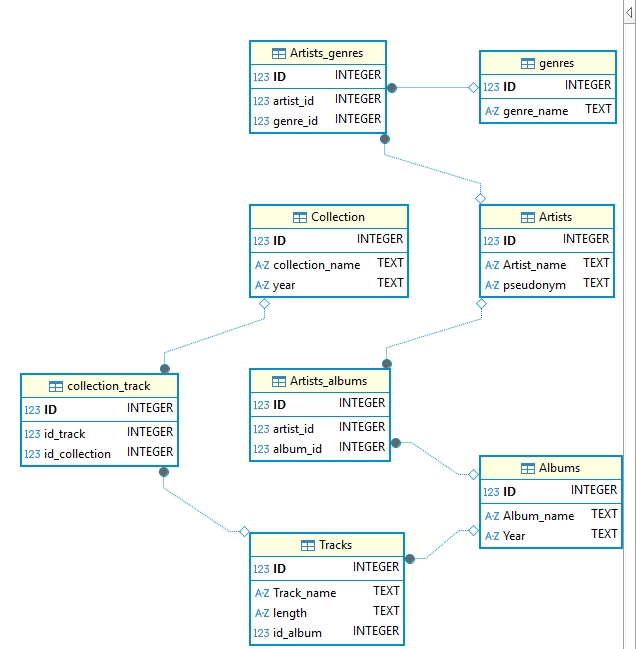

# DML

In [ ]:
db_path = "sakila.db"
%load_ext sql
%sql sqlite:///$db_path
%config SqlMagic.style = '_DEPRECATED_DEFAULT'

1 задача

In [ ]:
%%sql
select * from customer

2 задача

In [ ]:
%%sql
select * 
from film
ORDER BY title

3 задача

In [ ]:
%%sql
select distinct name from category

4 задача

In [ ]:
%%sql
select name from language

5 задача

In [ ]:
%%sql
select title,length 
from film
where length > 120

6 задача

In [ ]:
%%sql
select title,length 
from film
order by length asc

7 задача

In [ ]:
%%sql
select cus.first_name, cus.last_name, cit.city
from customer cus
join address ad on cus.address_id = ad.address_id
join city cit on ad.city_id = cit.city_id
where cit.city = 'London'

8 задача

In [ ]:
%%sql
select f.title,c.name
from film f
join film_category fc on f.film_id = fc.film_id
join category c on c.category_id = fc.category_id
where c.name='Comedy'

9 задача

In [ ]:
%%sql
select f.title, a.first_name, a.last_name, a.actor_id
from film f
join film_actor fa on f.film_id = fa.film_id
join actor a on a.actor_id = fa.actor_id
where a.actor_id=5

10 задача

In [ ]:
%%sql
select f.title, count(r.rental_id) rentals
from film f
join inventory i on f.film_id = i.film_id
join rental r on i.inventory_id = r.inventory_id
group by f.title
order by rentals desc

11 задача

In [ ]:
%%sql
select distinct c.customer_id,c.first_name , c.last_name, p.amount
from customer c
join payment p on p.customer_id = c.customer_id
where p.amount > 10
order by c.customer_id

12 задача

In [ ]:
%%sql
select customer_id, first_name ,last_name, create_date
from customer
where create_date like '2006-02%'

13 задача

In [ ]:
%%sql
Select strftime('%m/%Y',payment_date) as Date , sum(amount) total_sum
from payment
group by Date


14 задача

In [ ]:
%%sql
select c.first_name, c.last_name, c.customer_id, count(r.rental_id) rentals
from customer c
join rental r on r.customer_id = c.customer_id
group by c.customer_id


15 задача

In [ ]:
%%sql
select c.first_name, c.last_name, c.customer_id, r.return_date
from customer c
join rental r on r.customer_id = c.customer_id
where r.return_date is NULL
group by c.customer_id

16 задача

In [ ]:
%%sql
select f.title, count (r.rental_id) rentals
from film f
left join inventory i on i.film_id = f.film_id
left join rental r on r.inventory_id = i.inventory_id
group by f.film_id
having rentals = 0

17 задача

In [ ]:
%%sql
select c.customer_id, c.first_name,c.last_name,r.rental_date
from customer c
join rental r on r.customer_id = c.customer_id
where r.rental_date between '2005-05-01' and '2005-05-31'
group by c.customer_id

18 задача

In [ ]:
%%sql
select f.title,f.film_id,s.store_id,s.address_id,c.name
from film f
join inventory i on i.film_id = f.film_id
join store s on s.store_id = i.store_id
join film_category fc on f.film_id = fc.film_id
join category c on c.category_id = fc.category_id
where c.name='Horror'
group by s.store_id

19 задача

In [ ]:
%%sql
select strftime('%m/%Y',r.rental_date) as Date, f.title, f.film_id, count(r.rental_id) rentals
from film f
join inventory i on f.film_id = i.film_id
join rental r on r.inventory_id = i.inventory_id
group by f.film_id, date
having rentals > 30


20 задача

In [ ]:
%%sql
select c.first_name, c.last_name, c.customer_id , sum(p.amount) payments
from customer c
join rental r on r.customer_id = c.customer_id
join payment p on p.rental_id = r.rental_id
group by c.customer_id
having payments > 50
order by payments